<a href="https://colab.research.google.com/github/wan-fazirah/house-price-pedicting/blob/main/Group1_asg2_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for the requirement of Assignment 2 for Data Mining Subject to predict house pricing.
-group member consists of
1. Atirah Husnina
2. Nor Sakinah
3. Sitti Wan Fazirah

Data Exploration

In [18]:
# data exploratory
houses<-read.csv("housing_price_dataset.csv")
head(houses)
summary(houses)
any(is.na(houses))
summary(houses$Neighborhood)
summary(houses$Price)
houses$Price <- round(houses$Price, 2)
head(houses)
summary(houses$Price)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
,<int>,<int>,<int>,<chr>,<int>,<dbl>
1,2126,4,1,Rural,1969,215355.3
2,2459,3,2,Rural,1980,195014.2
3,1860,2,1,Suburb,1970,306891.0
4,2294,2,1,Urban,1996,206786.8
5,2130,5,2,Suburb,2001,272436.2
6,2095,2,3,Suburb,2020,198208.8


   SquareFeet      Bedrooms       Bathrooms     Neighborhood      
 Min.   :1000   Min.   :2.000   Min.   :1.000   Length:50000      
 1st Qu.:1513   1st Qu.:3.000   1st Qu.:1.000   Class :character  
 Median :2007   Median :3.000   Median :2.000   Mode  :character  
 Mean   :2006   Mean   :3.499   Mean   :1.995                     
 3rd Qu.:2506   3rd Qu.:4.000   3rd Qu.:3.000                     
 Max.   :2999   Max.   :5.000   Max.   :3.000                     
   YearBuilt        Price       
 Min.   :1950   Min.   :-36588  
 1st Qu.:1967   1st Qu.:169956  
 Median :1985   Median :225052  
 Mean   :1985   Mean   :224827  
 3rd Qu.:2003   3rd Qu.:279374  
 Max.   :2021   Max.   :492195  

[1] FALSE

   Length     Class      Mode 
    50000 character character 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -36588  169956  225052  224827  279374  492195 

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
,<int>,<int>,<int>,<chr>,<int>,<dbl>
1,2126,4,1,Rural,1969,215355.3
2,2459,3,2,Rural,1980,195014.2
3,1860,2,1,Suburb,1970,306891.0
4,2294,2,1,Urban,1996,206786.8
5,2130,5,2,Suburb,2001,272436.2
6,2095,2,3,Suburb,2020,198208.8


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -36588  169956  225052  224827  279374  492195 

Partitional clustering - Atirah Husnina

In [2]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
houses$Neighborhood_numeric <- as.numeric(as.factor(houses$Neighborhood))
summary(houses$Neighborhood_numeric) # summary statistics for variable Neighborhood
summary(houses$Neighborhood) # summary statistics for variable Neighborhood
summary(houses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.999   3.000   3.000 

   Length     Class      Mode 
    50000 character character 

   SquareFeet      Bedrooms       Bathrooms     Neighborhood      
 Min.   :1000   Min.   :2.000   Min.   :1.000   Length:50000      
 1st Qu.:1513   1st Qu.:3.000   1st Qu.:1.000   Class :character  
 Median :2007   Median :3.000   Median :2.000   Mode  :character  
 Mean   :2006   Mean   :3.499   Mean   :1.995                     
 3rd Qu.:2506   3rd Qu.:4.000   3rd Qu.:3.000                     
 Max.   :2999   Max.   :5.000   Max.   :3.000                     
   YearBuilt        Price        Neighborhood_numeric
 Min.   :1950   Min.   :-36588   Min.   :1.000       
 1st Qu.:1967   1st Qu.:169956   1st Qu.:1.000       
 Median :1985   Median :225052   Median :2.000       
 Mean   :1985   Mean   :224827   Mean   :1.999       
 3rd Qu.:2003   3rd Qu.:279374   3rd Qu.:3.000       
 Max.   :2021   Max.   :492195   Max.   :3.000       

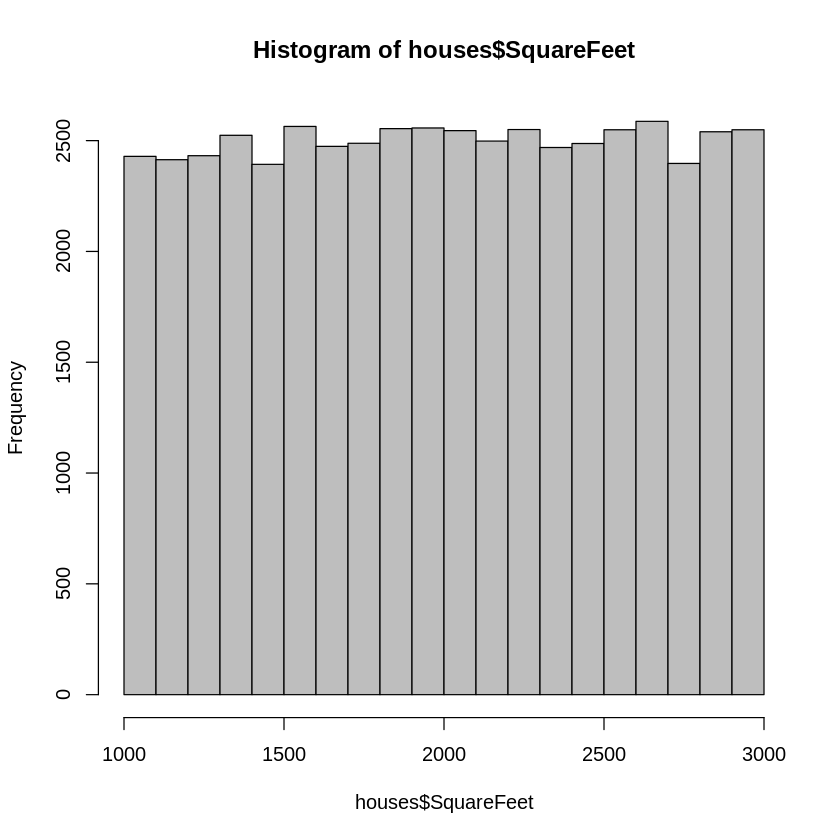

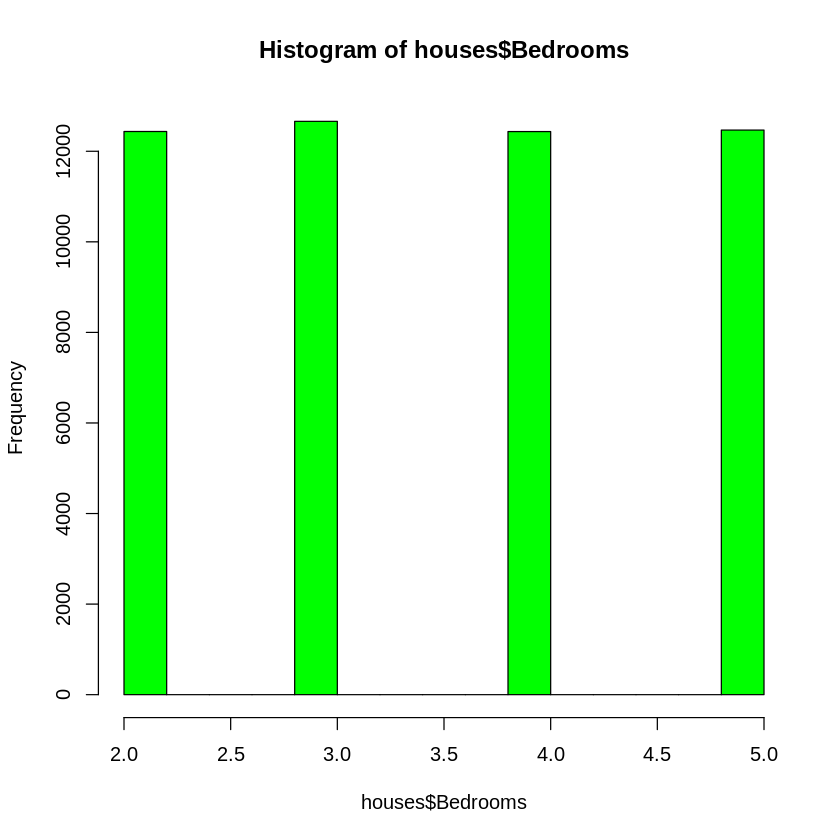

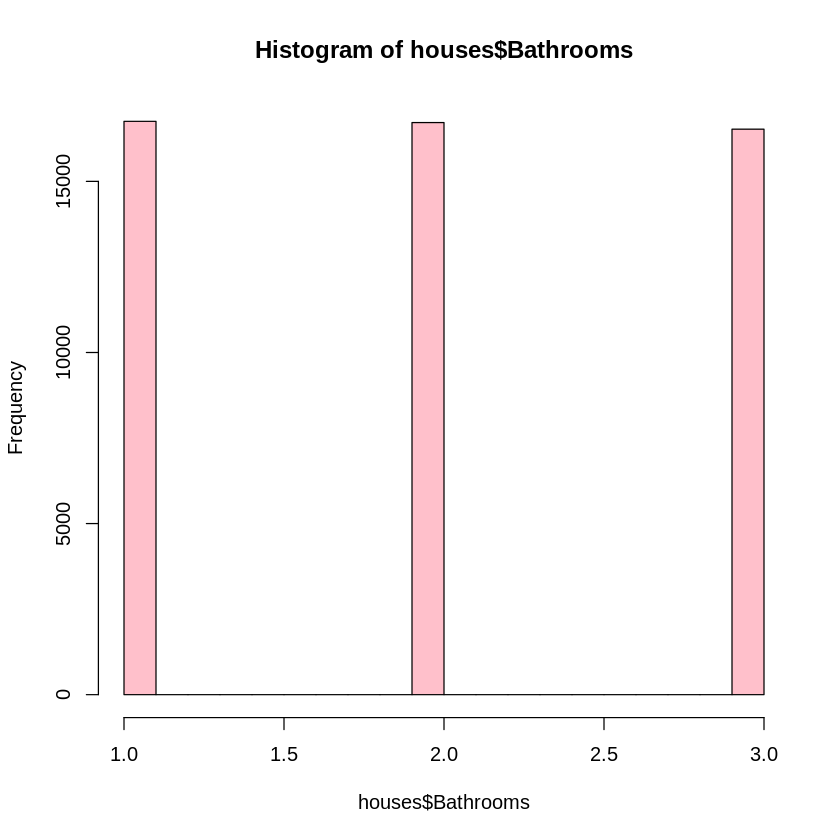

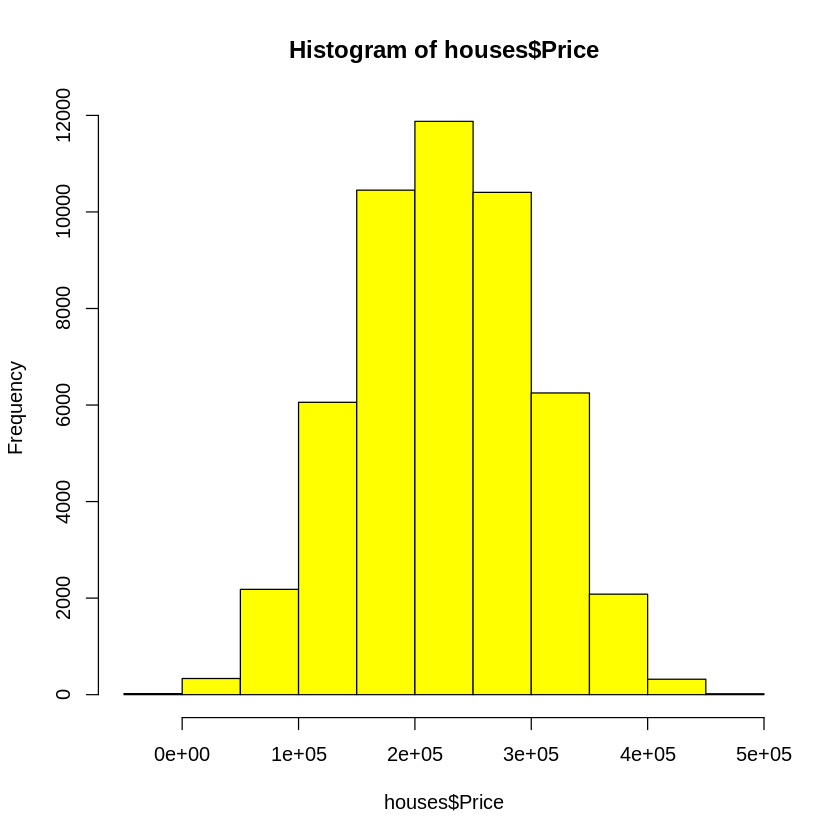

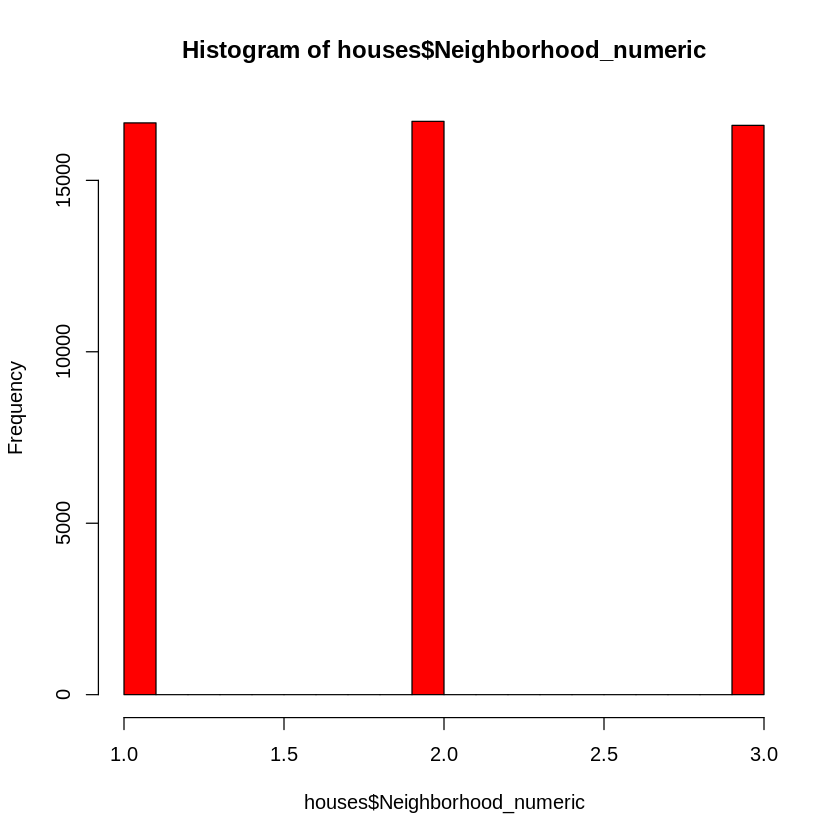

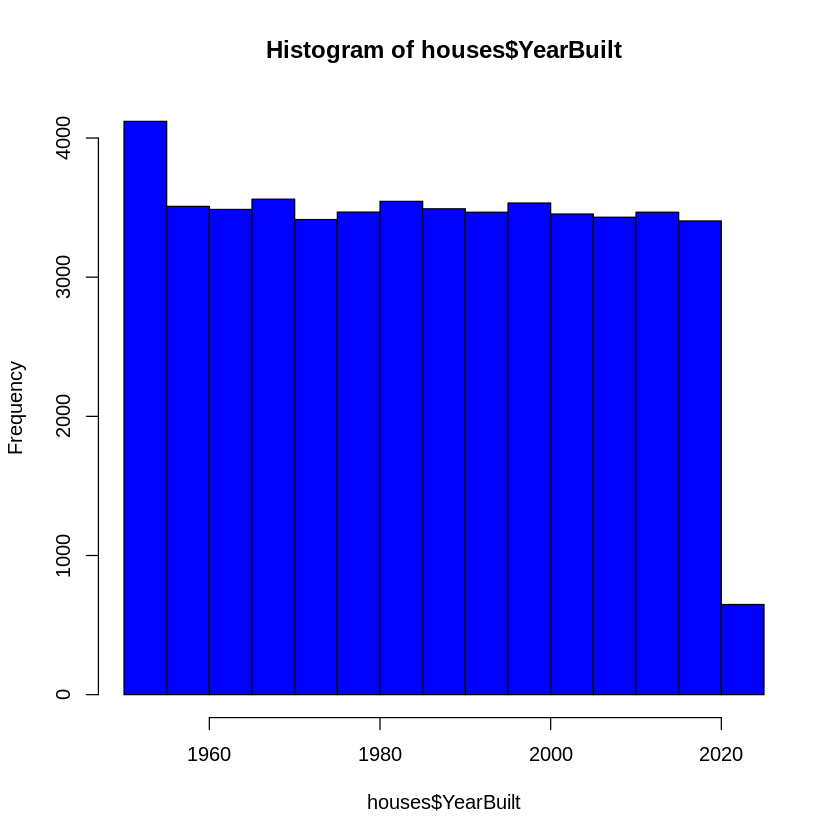

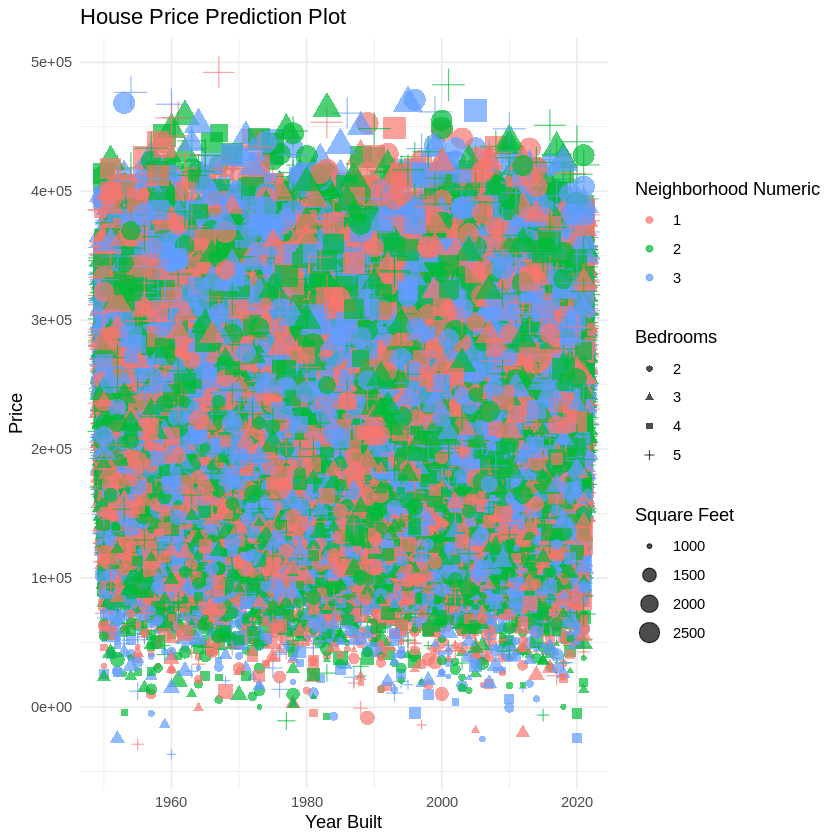

Mean Squared Error (MSE): 988042319 
Root Mean Squared Error (RMSE): 31433.14 


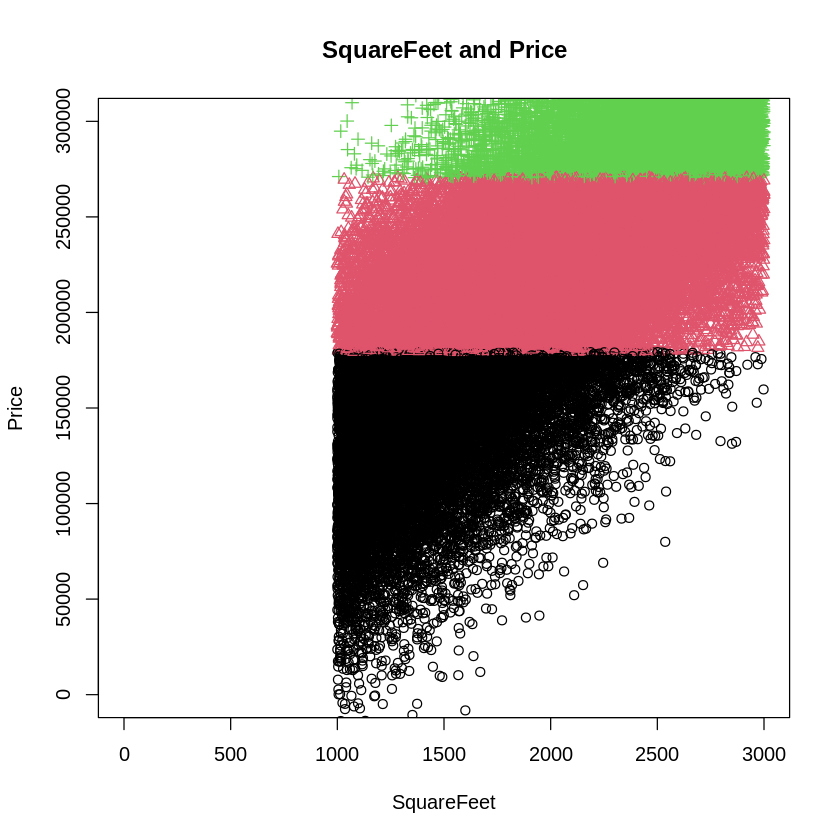

In [24]:
# histograms for various features in the dataset
hist(houses$SquareFeet, col = 'grey')
hist(houses$Bedrooms, col = 'green')
hist(houses$Bathrooms, col = 'pink')
hist(houses$Price, col = 'yellow')
hist(houses$Neighborhood_numeric, col = 'red')
hist(houses$YearBuilt, col = 'blue')

# create scatterplot using ggplot2
library(ggplot2)
ggplot(houses, aes(x = YearBuilt, y = Price, color = factor(Neighborhood_numeric), size = SquareFeet)) + geom_point(aes(shape = factor(Bedrooms)), alpha = 0.7) +
 labs(title = "House Price Prediction Plot",
       x = "Year Built",
       y = "Price",
       color = "Neighborhood Numeric",
       size = "Square Feet",
       shape = "Bedrooms") +
 theme_minimal()
k <- 3
k_3<-kmeans(houses[, c("SquareFeet", "Bedrooms", "Bathrooms", "Price", "Neighborhood_numeric", "YearBuilt")],3) # perform k-means clustering with k=3
cluster_centers <- k_3$centers
clusters <- k_3$cluster
clus<-cbind(houses,clus2=k_3$cluster) # combine cluster information with original dataset

# create scatter plot of SquareFeet against Price, colored by cluster
plot(clus$SquareFeet, clus$Price, col=k_3$cluster, pch=k_3$cluster, main = "SquareFeet and Price", xlim=c(0,3000), ylim=c(0,300000), xlab= "SquareFeet", ylab="Price")

predicted_prices <- cluster_centers[clusters, "Price"]

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
true_prices <- houses$Price
mse <- mean((true_prices - predicted_prices)^2)
rmse <- sqrt(mse)

# Print MSE and RMSE
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")


Decision Tree- Nor Sakinah Rosman

In [5]:
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n= 40000 

node), split, n, deviance, yval
      * denotes terminal node

1) root 40000 2.312133e+14 225031.8  
  2) SquareFeet< 2042.5 20619 7.027359e+13 177010.1  
    4) SquareFeet< 1498.5 9623 2.651412e+13 149611.8 *
    5) SquareFeet>=1498.5 10996 3.021414e+13 200987.3 *
  3) SquareFeet>=2042.5 19381 6.280416e+13 276120.9  
    6) SquareFeet< 2519.5 9603 2.622636e+13 252260.2 *
    7) SquareFeet>=2519.5 9778 2.574095e+13 299554.7 *
[1] 52704.08
[1] 2777719935


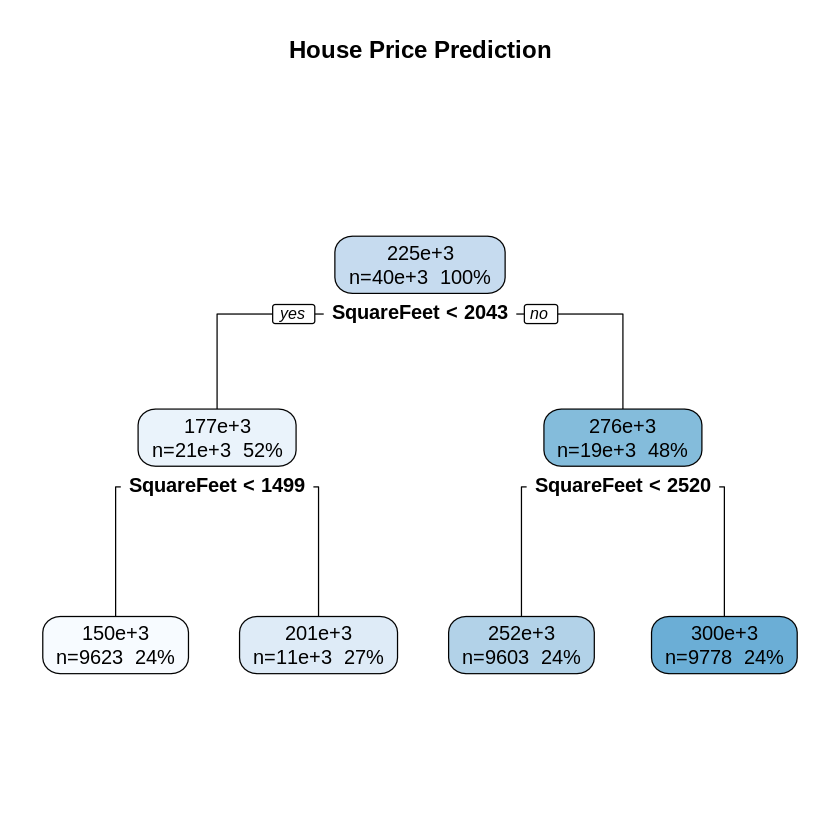

In [7]:
# install and load required package
library(rpart)
library(rpart.plot)

# read dataset from CSV file
houses <- read.csv("housing_price_dataset.csv", stringsAsFactors = TRUE)

# convert var Neighborhood to factor of 0,1,2
houses$Neighborhood <- factor(houses$Neighborhood, levels = c("Rural", "Suburb", "Urban"), labels = c(0, 1, 2))

set.seed(123) # set seed number for reproducibility

# split data for training and testing sets
data_split <- sample.int(n = nrow(houses), size = floor(nrow(houses)*0.8))
train_data <- houses[data_split,]
test_data <- houses[-data_split,]

# build regression decision tree model using training data
model_rpart <- rpart(Price ~ ., data = train_data, method = "anova")
print(model_rpart) # print the details of trained model

# visualizing the decision tree-plotting the tree
rpart.plot(model_rpart, extra = 101, main = "House Price Prediction" )

# make predictions on test data
predictions_rpart <- predict(model_rpart, test_data)
predicted_prices <- predict(model_rpart, test_data)

# calculate residuals error (substracting actual prices from predicted prices)
residuals <- test_data$Price - predicted_prices
squared_residuals <- residuals^2 # calculate squared_residuals
mean_squared_error <- mean(squared_residuals) # calculate mean_squared_error
rmse <- sqrt(mean_squared_error) # calculate root for mean_squared_error

# display results for rmse and mean_squared_error
print(rmse)
print(mean_squared_error)

Bayesian Classifier -Sitti Wan Fazirah

In [8]:
# Install and loading required package
install.packages("e1071")
library(e1071)

head(houses) # Display first few rows of the 'houses' dataset
# Convert each numerical attributes to categorical variable
houses$Price <- ifelse(houses$Price > 250000, "High", "Low")
houses$YearBuilt <- ifelse(houses$YearBuilt > 2000, "New", "Old")
houses$Bedrooms <- ifelse(houses$Bedrooms > 3, "Many", "Less")
houses$Bathrooms <- ifelse(houses$Bathrooms > 2, "Many", "Less")
houses$SquareFeet <- ifelse(houses$SquareFeet > 2200, "Large", "Small")
head(houses) # Display 1st few rows of dataset to check all attributes has been converted

# Build naive Bayes model on modified dataset
model <- naiveBayes(Price ~ ., data = houses)

# Make raw predictions on the first 10 rows of the dataset
predict(model, houses[1:10,], type = "raw")
pred <- predict(model, houses) # Make predictions on entire dataset

# Get raw predictions for all instances
predictions <- predict(model, houses, type = "raw")
table(pred, houses$Price) # Create confusion table to evaluate model

# Apply threshold to raw predictions to get predicted labels
predicted_labels <- apply(predictions, 1, function(row) ifelse(row["High"] > row["Low"], "High", "Low"))
actual_labels <- houses$Price # Extract actual label form dataset

# Create vector of 0s and 1s (based on incorrect/correct predictions)
residuals <- ifelse(predicted_labels == actual_labels, 0, 1)

# Calculations
squared_residuals <- residuals^2 # Calculate squared residuals
mse <- mean(squared_residuals) # Calculate Mean Squared Error (MSE)
rmse <- sqrt(mse) # Calculate Root Mean Squared Error (RMSE)

# Print the calculated MSE and RMSE and its predicted output
cat("Mean Squared Error (MSE):", mse, "\n") # Mean Squared Error (MSE): 0.1939
cat("Root Mean Squared Error (RMSE):", rmse, "\n") # Root Mean Squared Error (RMSE): 0.4403408

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
,<int>,<int>,<int>,<fct>,<int>,<dbl>
1,2126,4,1,0,1969,215355.3
2,2459,3,2,0,1980,195014.2
3,1860,2,1,1,1970,306891.0
4,2294,2,1,2,1996,206786.8
5,2130,5,2,1,2001,272436.2
6,2095,2,3,1,2020,198208.8


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>
1,Small,Many,Less,0,Old,Low
2,Large,Less,Less,0,Old,Low
3,Small,Less,Less,1,Old,High
4,Large,Less,Less,2,Old,Low
5,Small,Many,Less,1,New,High
6,Small,Less,Many,1,New,Low


High,Low
0.1530401,0.8469599
0.7014801,0.2985199
0.1237370,0.8762630
0.7154707,0.2845293
0.1520451,0.8479549
0.1339495,0.8660505
0.6962717,0.3037283
0.1628767,0.8371233
0.7716912,0.2283088
0.1643582,0.8356418


      
pred    High   Low
  High 14755  5373
  Low   4322 25550

Mean Squared Error (MSE): 0.1939 
Root Mean Squared Error (RMSE): 0.4403408 
